#### Analysis on Youtube Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
#load youtube data 

# Load the data into a DataFrame
yt_df = pd.read_csv("C:\\Users\\Ochieng' Oginga\\Documents\\Post_S\\Fall_2024\\Data_Science\\ds1-project\\yt-crime_data_2.csv")

# Display the first few rows of the data
yt_df.head()


,Title,URL,Likes,Views,Comments Count,Description,Published At,Channel ID,Channel Title
0,Inside the DC Mansion Murders (2015),https://www.youtube.com/watch?v=wfcN2iaE2vE,13918,1552637,1510,CNN's Pamela Brown speaks with investigators a...,2024-02-10T23:00:28Z,UCupvZG-5ko_eiXAupbDfxWw,CNN
1,Suspects wanted in DC homicide,https://www.youtube.com/watch?v=SDoOr39lAV0,1,280,0,D.C. police are looking for two people who the...,2024-09-18T20:56:10Z,UCP3sSdrcCw7qC0qSrD8xOHQ,DC News Now
2,DC Police search for suspect in homicide case,https://www.youtube.com/watch?v=H3Au26Fws64,8,1709,6,Police are searching for a suspect connected t...,2023-10-15T03:21:37Z,UCcT6w3xUyVshyR2_2vrMp1w,WUSA9
3,"32-year-old mother, special police officer ide...",https://www.youtube.com/watch?v=CmGtq06J7ik,21,1902,2,"On Monday, investigators say 32-year-old Cynth...",2021-11-02T03:38:10Z,UCcT6w3xUyVshyR2_2vrMp1w,WUSA9
4,D.C.&#39;s First Female Homicide Detective Unc...,https://www.youtube.com/watch?v=dw4exHCv5fY,1416,50096,107,Romaine Jenkins investigated many horrifying c...,2024-07-12T19:00:27Z,UCNIFiHaLZkYASaWDdkC1njg,A&E


In [3]:
# Filter the data for videos published after 2023-09-01
filtered_yt_df = yt_df[yt_df['Published At'] > '2023-09-01']

# Check the filtered data
print(filtered_yt_df)

                                                 Title  \
0                 Inside the DC Mansion Murders (2015)   
1                       Suspects wanted in DC homicide   
2        DC Police search for suspect in homicide case   
4    D.C.&#39;s First Female Homicide Detective Unc...   
5    DC double homicide victims identified; surveil...   
..                                                 ...   
784  Live🔴Akhilesh Yadav सदन में Sambhal पर बोले हि...   
785  Comprando a decoração do meu quarto novo 🌸🩷 #v...   
786  Me quede asi 👁️👄👁️ #minivlog #bakabakamx #lipg...   
787          TÍPICAS TRAVESURAS DE HERMANOS: (PARTE 3)   
788                CUANDO TE TOCA REPARTIDORA PREMIUM:   

                                             URL   Likes    Views  \
0    https://www.youtube.com/watch?v=wfcN2iaE2vE   13918  1552637   
1    https://www.youtube.com/watch?v=SDoOr39lAV0       1      280   
2    https://www.youtube.com/watch?v=H3Au26Fws64       8     1709   
4    https://www.youtube.co

In [4]:
#using crime dictionary from scraping 
crime_keywords_dict = {
    "homicide": ["murder", "killing", "manslaughter", "shooting"],
    "sex abuse": ["rape", "assault", "domestic violence", "gender violence"],
    "assault with dangerous weapon": ["aggravated assault", "attempted manslaughter", "battery"],
    "robbery": ["theft", "mugging", "stealing", "robbing"],
    "burglary": ["break in", "forced entry", "housebreaking", "trespassing"],
    "theft auto": ["motor vehicle theft", "carjacking", "vehicle larceny"],
    "theft other": [],
    "arson": ["destruction of property", "set on fire"]
}


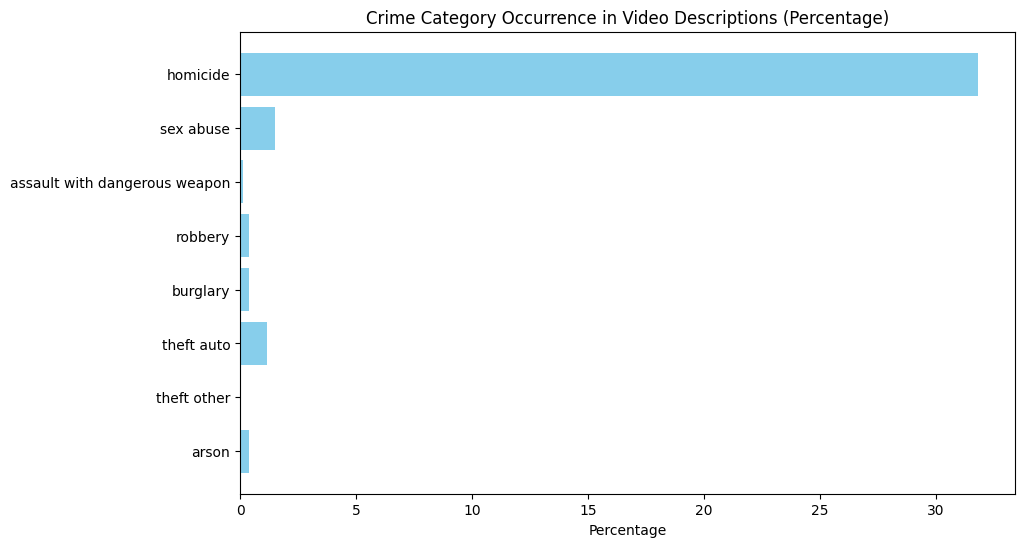

In [5]:
#distribution in perecentage 
# Initialize a dictionary to store counts for each crime category
crime_categories_counts = {category: 0 for category in crime_keywords_dict}

# Loop through the 'Description' column and count the occurrences of each category's keywords
for description in yt_df['Description']:
    if isinstance(description, str):  # Only process strings
        for category, keywords in crime_keywords_dict.items():
            for keyword in keywords:
                if keyword.lower() in description.lower():
                    crime_categories_counts[category] += 1
                    break  # No need to check further keywords for the current description
    else:
        continue  # Skip non-string descriptions

# Convert the dictionary to a DataFrame for easier visualization
category_df = pd.DataFrame(list(crime_categories_counts.items()), columns=['Crime Category', 'Count'])

# Calculate percentages based on total descriptions
total_descriptions = len(yt_df)
category_df['Percentage'] = (category_df['Count'] / total_descriptions) * 100

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(category_df['Crime Category'], category_df['Percentage'], color='skyblue')
plt.xlabel('Percentage')
plt.title('Crime Category Occurrence in Video Descriptions (Percentage)')
plt.gca().invert_yaxis()  # To display the highest percentage at the top
plt.show()

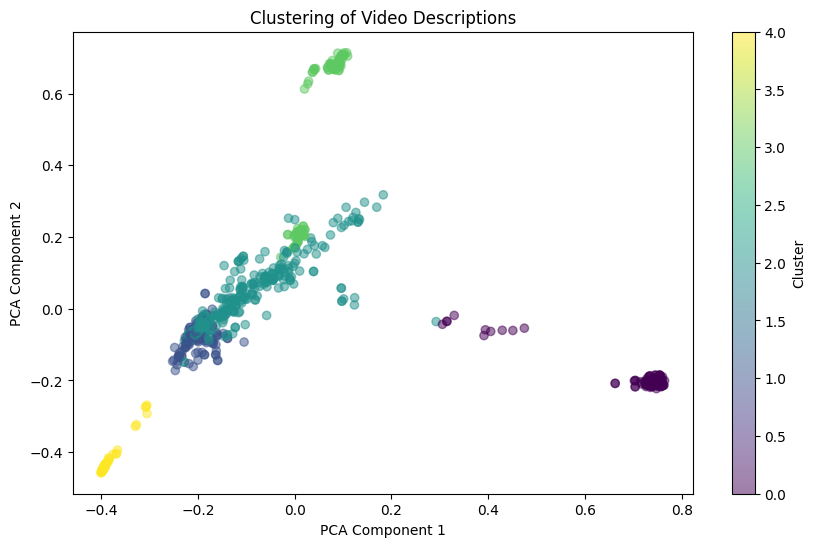

Cluster 0: fox, fox5dc, com, https, dc, tv, follow, weather, maryland, virginia
Cluster 1: police, year, old, shooting, homicide, murder, man, suspect, family, dc
Cluster 2: https, com, www, news, youtube, http, instagram, twitter, wusa9, video
Cluster 3: com, wjla, nbcwashington, https, nbc4, nbc4dc, http, roku, www, news
Cluster 4: department, homicide, rewards, assistance, text, police, tip, person, metropolitan, persons


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 1: Preprocess the descriptions
yt_df['Description'] = yt_df['Description'].fillna('')  # Handle missing values
yt_df['Description'] = yt_df['Description'].str.lower()  # Convert to lowercase

# Step 2: Vectorize the descriptions using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)  # Limit to top 1000 features
X = vectorizer.fit_transform(yt_df['Description'])

# Step 3: Apply K-means clustering
n_clusters = 5  # You can adjust the number of clusters based on your needs
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
yt_df['Cluster'] = kmeans.fit_predict(X)

# Step 4: Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X.toarray())

# Step 5: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=yt_df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Clustering of Video Descriptions')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Step 6: Optional: Display top terms per cluster
terms = vectorizer.get_feature_names_out()
top_n = 10  # Display top 10 terms per cluster

for i in range(n_clusters):
    cluster_center = kmeans.cluster_centers_[i]
    top_terms_idx = cluster_center.argsort()[-top_n:][::-1]
    top_terms = [terms[idx] for idx in top_terms_idx]
    print(f"Cluster {i}: {', '.join(top_terms)}")


In [8]:
#Top Channels 
# Group by 'Channel Title' and count the number of videos for each channel
channel_counts = yt_df['Channel Title'].value_counts()

# Display the top 5 channels based on the video count
top_5_channels = channel_counts.head(5)

print(top_5_channels)


Channel Title
FOX 5 Washington DC                             125
WUSA9                                           119
NBC4 Washington                                  64
Washington DC Metropolitan Police Department     62
ABC 7 News - WJLA                                45
Name: count, dtype: int64


In [9]:
#top 5 channels by viewership 
# Group by 'Channel Title' and sum the 'Views' for each channel
channel_views = yt_df.groupby('Channel Title')['Views'].sum()

# Display the top 5 channels based on total viewership
top_5_channels_by_views = channel_views.sort_values(ascending=False).head(5)

print(top_5_channels_by_views)


Channel Title
FOX 5 Washington DC    35615813
The FBI Files          17984072
ABC 10 News            15796030
Polimer News           14911717
Real Stories            7683277
Name: Views, dtype: int64


#### Predictive modeling 

Views Model Evaluation
Mean Absolute Error (MAE): 504536.99213125376
Mean Squared Error (MSE): 2964655433214.564
Root Mean Squared Error (RMSE): 1721817.4796460175

Likes Model Evaluation
Mean Absolute Error (MAE): 12906.658227848102
Mean Squared Error (MSE): 3099548421.592994
Root Mean Squared Error (RMSE): 55673.58818679638


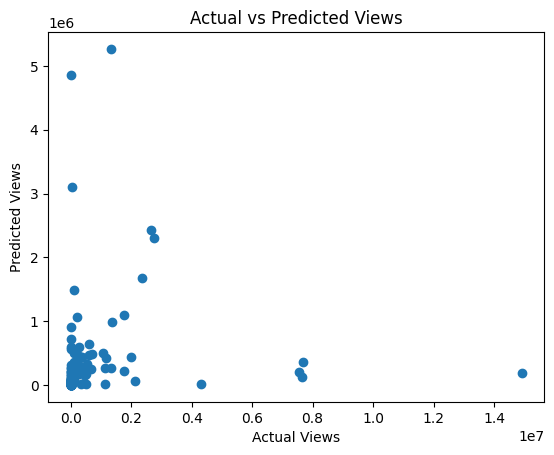

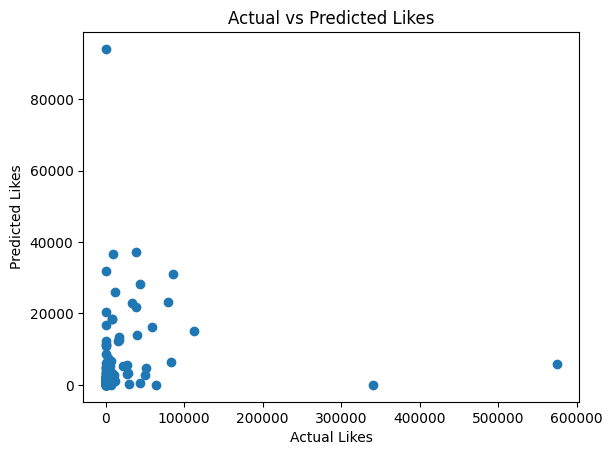

In [10]:
#
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Data Cleaning and Preparation
yt_df = yt_df.dropna(subset=['Title', 'Description', 'Views', 'Likes'])  # Dropping rows with missing values

# Step 2: Text Vectorization (TF-IDF for Title and Description)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
title_features = vectorizer.fit_transform(yt_df['Title'])
description_features = vectorizer.fit_transform(yt_df['Description'])

# Combine title and description features
from scipy.sparse import hstack
X = hstack([title_features, description_features])

# Step 3: Target Variables
y_views = yt_df['Views']  # Target variable for views
y_likes = yt_df['Likes']  # Target variable for likes

# Step 4: Train-Test Split
X_train, X_test, y_views_train, y_views_test = train_test_split(X, y_views, test_size=0.2, random_state=42)
_, _, y_likes_train, y_likes_test = train_test_split(X, y_likes, test_size=0.2, random_state=42)

# Step 5: Build the Predictive Model (Random Forest Regressor)
rf_views = RandomForestRegressor(n_estimators=100, random_state=42)
rf_likes = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
rf_views.fit(X_train, y_views_train)
rf_likes.fit(X_train, y_likes_train)

# Step 6: Make Predictions
y_views_pred = rf_views.predict(X_test)
y_likes_pred = rf_likes.predict(X_test)

# Step 7: Evaluate the Model
print("Views Model Evaluation")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_views_test, y_views_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_views_test, y_views_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_views_test, y_views_pred)))

print("\nLikes Model Evaluation")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_likes_test, y_likes_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_likes_test, y_likes_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_likes_test, y_likes_pred)))

# Visualize Predictions vs Actuals
import matplotlib.pyplot as plt

# Views
plt.scatter(y_views_test, y_views_pred)
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")
plt.title("Actual vs Predicted Views")
plt.show()

# Likes
plt.scatter(y_likes_test, y_likes_pred)
plt.xlabel("Actual Likes")
plt.ylabel("Predicted Likes")
plt.title("Actual vs Predicted Likes")
plt.show()


### More modeling

In [11]:
#data labeling 
def contains_crime_keywords(description, crime_keywords_dict):
    """Check if any keyword from crime_keywords_dict is present in the description"""
    for category, keywords in crime_keywords_dict.items():
        for keyword in keywords:
            if keyword in description.lower():
                return 1  # Mark as crime-related
    return 0  # Not crime-related

# Apply the function to label the data
yt_df['crime_related'] = yt_df['Description'].apply(lambda x: contains_crime_keywords(str(x), crime_keywords_dict))


In [12]:
# Vectorize the text data (title + description)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
title_features = vectorizer.fit_transform(yt_df['Title'])
description_features = vectorizer.fit_transform(yt_df['Description'])

# Combine title and description features into one matrix
X = hstack([title_features, description_features])

# Target variable
y = yt_df['crime_related']  # 1 if crime-related, 0 otherwise

In [13]:
#train calssification model 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8670886075949367
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       108
           1       0.82      0.74      0.78        50

    accuracy                           0.87       158
   macro avg       0.85      0.83      0.84       158
weighted avg       0.87      0.87      0.87       158



In [14]:
#predicting likelihood of engagement 
# convert views and likes to a classification problem based on threshold values of engagement
yt_df['high_engagement'] = np.where((yt_df['Likes'] > yt_df['Likes'].median()) & 
                                     (yt_df['Views'] > yt_df['Views'].median()), 1, 0)

# Now, you have a new target variable 'high_engagement' (1 if high engagement, 0 if low engagement)

# Create a new model to predict engagement based on the crime-related label
y_high_engagement = yt_df['high_engagement']  # Target variable for high engagement
X = hstack([title_features, description_features])  # Use same features

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_high_engagement, test_size=0.2, random_state=42)

# Train the model
clf_engagement = RandomForestClassifier(n_estimators=100, random_state=42)
clf_engagement.fit(X_train, y_train)

# Predict engagement
y_engagement_pred = clf_engagement.predict(X_test)

# Evaluate
print("Engagement Prediction Accuracy:", accuracy_score(y_test, y_engagement_pred))
print(classification_report(y_test, y_engagement_pred))

Engagement Prediction Accuracy: 0.8481012658227848
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        84
           1       0.80      0.89      0.85        74

    accuracy                           0.85       158
   macro avg       0.85      0.85      0.85       158
weighted avg       0.85      0.85      0.85       158



#### Using regression 

I think this is more cool

In [15]:
from sklearn.metrics import mean_squared_error
def contains_crime_keywords(description, crime_keywords_dict):
    """Check if any keyword from crime_keywords_dict is present in the description"""
    for category, keywords in crime_keywords_dict.items():
        for keyword in keywords:
            if keyword in description.lower():
                return 1  # Mark as crime-related
    return 0  # Not crime-related

# Apply the function to label the data
yt_df['crime_related'] = yt_df['Description'].apply(lambda x: contains_crime_keywords(str(x), crime_keywords_dict))

In [16]:
# Initialize a TF-IDF Vectorizer
vectorizer_title = TfidfVectorizer(stop_words='english', max_features=5000)
vectorizer_description = TfidfVectorizer(stop_words='english', max_features=5000)

# Vectorize the Title and Description columns
title_features = vectorizer_title.fit_transform(yt_df['Title'])
description_features = vectorizer_description.fit_transform(yt_df['Description'])

# Combine title and description features into one matrix (same dimensions for train/test sets)
X = hstack([title_features, description_features])

# Target variables: Views and Likes
y_views = yt_df['Views']
y_likes = yt_df['Likes']

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train_views, y_test_views = train_test_split(X, y_views, test_size=0.2, random_state=42)
X_train, X_test, y_train_likes, y_test_likes = train_test_split(X, y_likes, test_size=0.2, random_state=42)

# Train a Random Forest Regressor for Views
rf_views = RandomForestRegressor(n_estimators=100, random_state=42)
rf_views.fit(X_train, y_train_views)

# Train a Random Forest Regressor for Likes
rf_likes = RandomForestRegressor(n_estimators=100, random_state=42)
rf_likes.fit(X_train, y_train_likes)

RandomForestRegressor(random_state=42)

In [18]:
# Evaluate the model for Views (MSE and R-Squared)
y_pred_views = rf_views.predict(X_test)
mse_views = mean_squared_error(y_test_views, y_pred_views)
r2_views = rf_views.score(X_test, y_test_views)

# Evaluate the model for Likes (MSE and R-Squared)
y_pred_likes = rf_likes.predict(X_test)
mse_likes = mean_squared_error(y_test_likes, y_pred_likes)
r2_likes = rf_likes.score(X_test, y_test_likes)

# Print the results
print(f"Mean Squared Error (Views): {mse_views}")
print(f"R-Squared (Views): {r2_views}")
print(f"Mean Squared Error (Likes): {mse_likes}")
print(f"R-Squared (Likes): {r2_likes}")

Mean Squared Error (Views): 2964655433214.564
R-Squared (Views): -0.09581827649378338
Mean Squared Error (Likes): 3099548421.592994
R-Squared (Likes): -0.020205824644390802


In [19]:
#new video data
new_data = pd.DataFrame({
    'Title': ["Homicide reported in China Town DC"],
    'Description': ["A homicide was reported to MPD happening in China Town metro station early morning on Friday"]
})

# Vectorize the new data using the same vectorizer
new_title_features = vectorizer_title.transform(new_data['Title'])
new_description_features = vectorizer_description.transform(new_data['Description'])
new_X = hstack([new_title_features, new_description_features])

# Predict Views and Likes for the new video
predicted_views = rf_views.predict(new_X)
predicted_likes = rf_likes.predict(new_X)

print(f"Predicted Views: {predicted_views}")
print(f"Predicted Likes: {predicted_likes}")

Predicted Views: [36450.22]
Predicted Likes: [171.31]


#### Crime by locality 

In [20]:
#dictionary for locality 
crime_keywords_locality = {
    "northwest": ["northwest", "columbia heights", "nw"],
    "southwest": ["southwest", "sw"],
    "northeast": ["northeast", "ne"],
    "southeast": ["martin luther king avenue", "southeast", "se"]
}


# Another dictionary by key characteristics
crime_keywords_characteristics = {
    "adult_male": ["adult male", "adult man", "man"],
    "adult_female": ["adult female", "woman", "female", "women"],
    "teen_male": ["teen male", "male teen", "boy", "boys", "18-year-old man", "17-year-old male", "17-year-old man",
                  "19-year-old man", "19-year-old male", "16-year-old", "14-year-old", "teenager"],
    "teen_female": ["teen female", "female teen", "19-year-old woman", "18-year-old woman", "17-year-old woman",
                    "17-year-old girl", "17-year-old female", "16-year-old", "14-year-old", "15-year-old",
                    "teenager"],
    "child": ["child", "baby", "toddler", "kid", "two-year-old", "little girl", "little boy", "13-year-old", "children"]
}

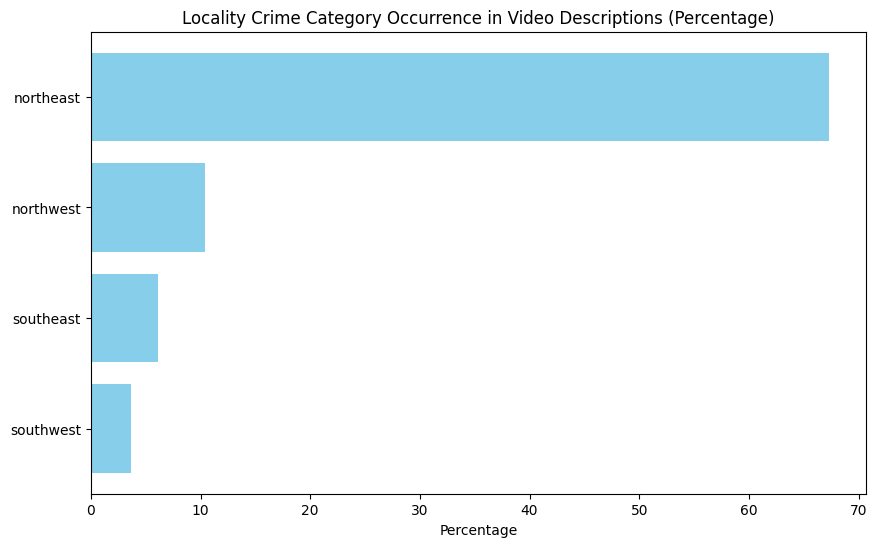

In [21]:
# Initialize a dictionary to store counts for each locality-based crime category
locality_crime_counts = {category: 0 for category in crime_keywords_locality}

# Loop through the 'Description' column and categorize descriptions uniquely
for description in yt_df['Description']:
    if isinstance(description, str):  # Only process strings
        matched = False
        for category, keywords in crime_keywords_locality.items():
            for keyword in keywords:
                if keyword.lower() in description.lower():
                    locality_crime_counts[category] += 1
                    matched = True
                    break  # Stop checking keywords for the current category
            if matched:
                break  # Stop checking other categories if already matched
    else:
        continue  # Skip non-string descriptions

# Convert the dictionary to a DataFrame for easier visualization
locality_category_df = pd.DataFrame(list(locality_crime_counts.items()), columns=['Locality Crime Category', 'Count'])

# Calculate percentages based on total descriptions
total_descriptions = len(yt_df)
locality_category_df['Percentage'] = (locality_category_df['Count'] / total_descriptions) * 100

# Sort the DataFrame by the 'Percentage' column in ascending order
locality_category_df = locality_category_df.sort_values(by='Percentage', ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(locality_category_df['Locality Crime Category'], locality_category_df['Percentage'], color='skyblue')
plt.xlabel('Percentage')
plt.title('Locality Crime Category Occurrence in Video Descriptions (Percentage)')
plt.gca().invert_yaxis()  # To display the highest percentage at the top
plt.show()



#### Crime by characteristics 

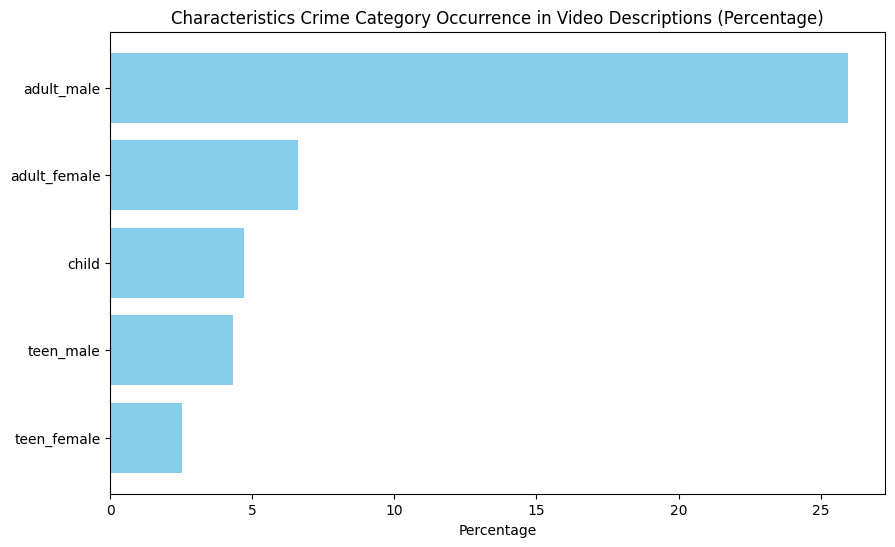

In [22]:
# Initialize a dictionary to store counts for each characteristics-based crime category
characteristics_crime_counts = {category: 0 for category in crime_keywords_characteristics}

# Loop through the 'Description' column and count the occurrences of each category's keywords
for description in yt_df['Description']:
    if isinstance(description, str):  # Only process strings
        for category, keywords in crime_keywords_characteristics.items():
            for keyword in keywords:
                if keyword.lower() in description.lower():
                    characteristics_crime_counts[category] += 1
                    break  # Stop checking keywords for the current category
    else:
        continue  # Skip non-string descriptions

# Convert the dictionary to a DataFrame for easier visualization
characteristics_category_df = pd.DataFrame(list(characteristics_crime_counts.items()), columns=['Characteristics Crime Category', 'Count'])

# Calculate percentages based on total descriptions
total_descriptions = len(yt_df)
characteristics_category_df['Percentage'] = (characteristics_category_df['Count'] / total_descriptions) * 100

# Sort the DataFrame by the 'Percentage' column in ascending order
characteristics_category_df = characteristics_category_df.sort_values(by='Percentage', ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(characteristics_category_df['Characteristics Crime Category'], characteristics_category_df['Percentage'], color='skyblue')
plt.xlabel('Percentage')
plt.title('Characteristics Crime Category Occurrence in Video Descriptions (Percentage)')
plt.gca().invert_yaxis()  # To display the highest percentage at the top
plt.show()

In [23]:
#inferential model

In [28]:
print(yt_df.columns)

Index(['Title', 'URL', 'Likes', 'Views', 'Comments Count', 'Description',
       'Published At', 'Channel ID', 'Channel Title'],
      dtype='object')


In [29]:
import pandas as pd
import statsmodels.api as sm

# List of keywords to look for in the 'Title' and 'Description'
keywords = ['homicide', 'sex abuse', 'assault with dangerous weapon', 'robbery', 'burglary', 'theft auto', 'theft other', 'arson']

# Create binary columns for each keyword in both 'Title' and 'Description'
for keyword in keywords:
    yt_df[keyword] = (
        yt_df['Title'].str.contains(keyword, case=False, na=False) | 
        yt_df['Description'].str.contains(keyword, case=False, na=False)
    ).astype(int)

# Define the independent variables (X) and dependent variable (y)
X = yt_df[keywords]
X = sm.add_constant(X) 
y = yt_df['Views'] 

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Show the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Views   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     8.823
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           5.70e-07
Time:                        00:32:10   Log-Likelihood:                -12216.
No. Observations:                 789   AIC:                         2.444e+04
Df Residuals:                     784   BIC:                         2.446e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

C:\Users\Ochieng' Oginga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


C:\Users\Ochieng' Oginga\AppData\Local\Temp\ipykernel_19720\357084338.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.index, y=coefficients.values, palette='coolwarm')


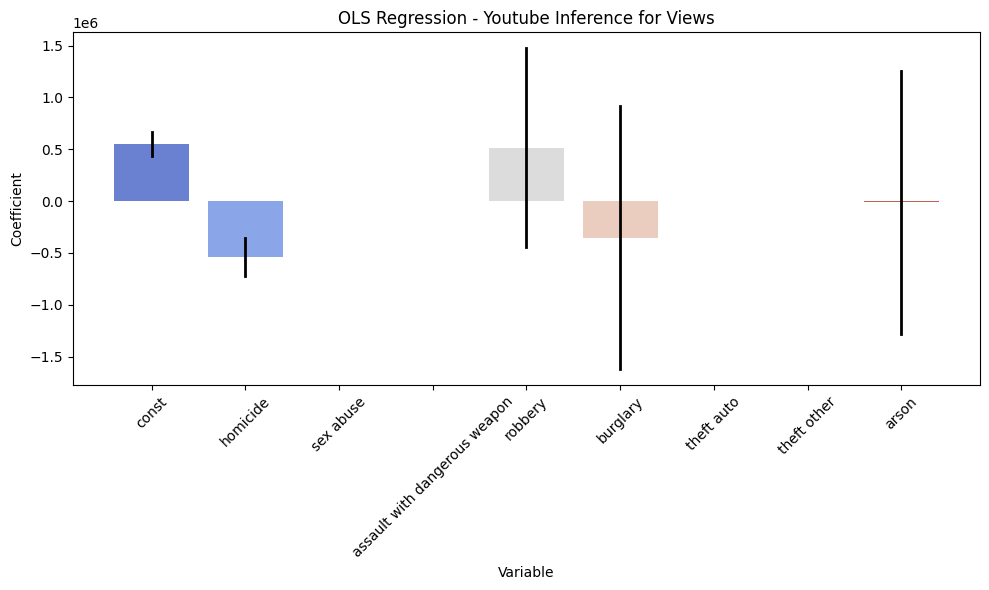

In [34]:
#have output as a visualization  
import matplotlib.pyplot as plt
import seaborn as sns

# List of keywords to look for in the 'Title' and 'Description'
keywords = ['homicide', 'sex abuse', 'assault with dangerous weapon', 'robbery', 'burglary', 'theft auto', 'theft other', 'arson']

# Create binary columns for each keyword in both 'Title' and 'Description'
for keyword in keywords:
    yt_df[keyword] = (
        yt_df['Title'].str.contains(keyword, case=False, na=False) | 
        yt_df['Description'].str.contains(keyword, case=False, na=False)
    ).astype(int)

# Define the independent variables (X) and dependent variable (y)
X = yt_df[keywords]
X = sm.add_constant(X)  # Add the constant term for the intercept
y = yt_df['Views']  # Assuming you want to predict 'Views'

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Get the coefficients and their confidence intervals
coefficients = model.params
conf_int = model.conf_int()

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the coefficients
sns.barplot(x=coefficients.index, y=coefficients.values, palette='coolwarm')

# Plot the confidence intervals
for i, coeff in enumerate(coefficients):
    plt.plot([i, i], [conf_int.iloc[i, 0], conf_int.iloc[i, 1]], color='black', lw=2)

# Add labels and title
plt.xlabel('Variable')
plt.ylabel('Coefficient')
plt.title('OLS Regression - Youtube Inference for Views')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()




In [31]:
# Define the independent variables (X) and dependent variable (y)
X = yt_df[keywords]
X = sm.add_constant(X) 
y = yt_df['Likes'] 

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Show the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     8.436
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           1.15e-06
Time:                        00:37:05   Log-Likelihood:                -9350.3
No. Observations:                 789   AIC:                         1.871e+04
Df Residuals:                     784   BIC:                         1.873e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

C:\Users\Ochieng' Oginga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


C:\Users\Ochieng' Oginga\AppData\Local\Temp\ipykernel_19720\2504653331.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.index, y=coefficients.values, palette='coolwarm')


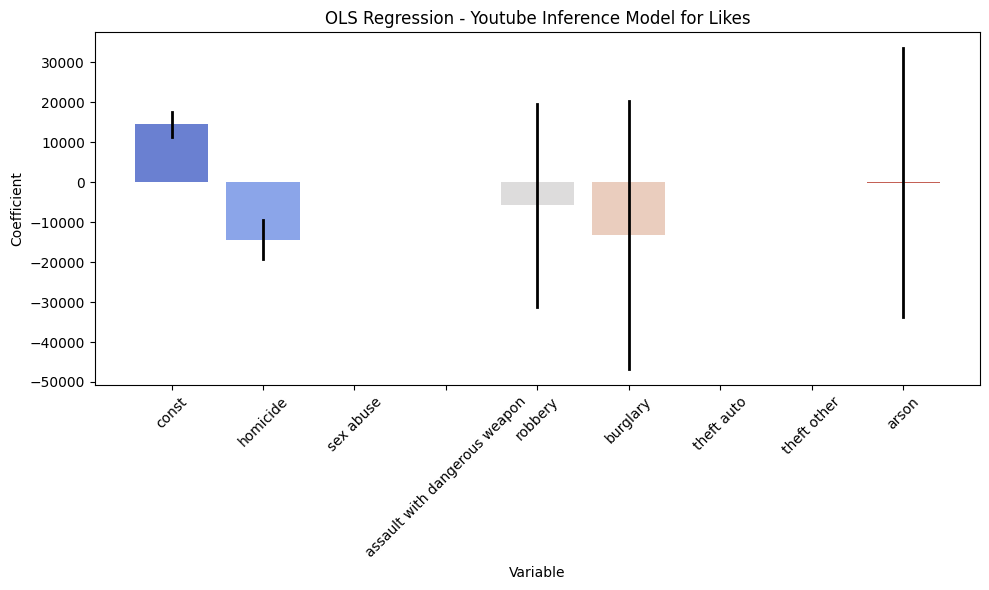

In [33]:
# Define the independent variables (X) and dependent variable (y)
X = yt_df[keywords]
X = sm.add_constant(X) 
y = yt_df['Likes'] 

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Get the coefficients and their confidence intervals
coefficients = model.params
conf_int = model.conf_int()

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the coefficients
sns.barplot(x=coefficients.index, y=coefficients.values, palette='coolwarm')

# Plot the confidence intervals
for i, coeff in enumerate(coefficients):
    plt.plot([i, i], [conf_int.iloc[i, 0], conf_int.iloc[i, 1]], color='black', lw=2)

# Add labels and title
plt.xlabel('Variable')
plt.ylabel('Coefficient')
plt.title('OLS Regression - Youtube Inference Model for Likes')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()